In [ ]:
%pip install poliastro
%pip install astropy
%pip install numpy
%pip install astropy
%pip install numpy
%pip install jplephem
%pip install matplotlib
%pip install numba
%pip install plotly==5.13.1
%pip install scipy

In [ ]:
%pip install pyorbital

In [ ]:
%pip install skyfield

In [ ]:
from skyfield.api import load, Topos, utc

In [ ]:
from pyorbital import tlefile
from pyorbital.orbital import Orbital
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [ ]:
from pickle import encode_long
df = pd.DataFrame(columns=['SatName','Time', 'longitude', 'latitude', 'altitude', 'px', 'py', 'pz'])
SatName=["STARLINK-2701", "STARLINK-1008", "IRIDIUM-122", "AMAZONIA-1"]

TLEline11 = '1 48656U 21044U   24339.55275590  .00026086  00000+0  17641-2 0  9991'
TLEline12 = '2 48656  53.0534  27.2526 0001973  90.0742 270.0473 15.06391245194358'

TLEline21 = '1 44714U 19074B   25012.00402021  .00004094  00000+0  29358-3 0  9996'
TLEline22 = '2 44714  53.0539 279.6404 0001242  80.1545 279.9584 15.06395110285360'

TLEline31 = '1 42957U 17061C   25007.49702594  .00000117  00000+0  34556-4 0  9991'
TLEline32 = '2 42957  86.3957 244.8288 0001777  86.7983 273.3416 14.34214161379435'

TLEline41 = '1 47699U 21015A   24331.66896108  .00000823  00000+0  27046-3 0  9995'
TLEline42 = '2 47699  98.3819  44.8584 0001784 110.4232 249.7148 14.40820713196923'

TLEline1 = [TLEline11, TLEline21, TLEline31, TLEline41]
TLEline2 = [TLEline12, TLEline22, TLEline32, TLEline42]

Timestart = [datetime(2023, 2, 12, 9, 0, 0), datetime(2024, 10, 25, 7, 30, 0), datetime(2024, 2, 16, 6, 30, 0), datetime(2024, 10, 22, 13, 0, 0)]
end_time = [datetime(2023, 2, 12, 10, 0, 0), datetime(2024, 10, 25, 8, 30), datetime(2024, 2, 16, 7, 20), datetime(2024, 10, 22, 14, 20)]
step = timedelta(seconds = 1.)

In [ ]:
TLEline1[0]

'1 48656U 21044U   24339.55275590  .00026086  00000+0  17641-2 0  9991'

In [ ]:
lat_unicamp = -22.8542
lon_unicamp = -47.0220

In [ ]:
lat_ufpa = -1.4677
lon_ufpa = -48.4435

In [ ]:
#orb = Orbital(SatName, line1=TLEline11, line2=TLEline12)
#orb.get_lonlatalt(Timestart)

In [ ]:
for SatName, TLEline1, TLEline2, current_time, end in zip(SatName, TLEline1, TLEline2, Timestart, end_time):
  print(SatName)
  print(TLEline1)
  print(TLEline2)
  orb = Orbital(SatName, line1=TLEline1, line2=TLEline2)
  while current_time < end:
    ArrayP = orb.get_position(current_time)[1]
    ArrayG = orb.get_lonlatalt(current_time)
    df.loc[len(df.index)] = [SatName,current_time, ArrayG[0], ArrayG[1], ArrayG[2], ArrayP[0], ArrayP[1], ArrayP[2]]
    current_time += step
df['TimeString'] = df['Time'].astype(str)

STARLINK-2701
1 48656U 21044U   24339.55275590  .00026086  00000+0  17641-2 0  9991
2 48656  53.0534  27.2526 0001973  90.0742 270.0473 15.06391245194358
STARLINK-1008
1 44714U 19074B   25012.00402021  .00004094  00000+0  29358-3 0  9996
2 44714  53.0539 279.6404 0001242  80.1545 279.9584 15.06395110285360
IRIDIUM-122
1 42957U 17061C   25007.49702594  .00000117  00000+0  34556-4 0  9991
2 42957  86.3957 244.8288 0001777  86.7983 273.3416 14.34214161379435
AMAZONIA-1
1 47699U 21015A   24331.66896108  .00000823  00000+0  27046-3 0  9995
2 47699  98.3819  44.8584 0001784 110.4232 249.7148 14.40820713196923


In [ ]:
!pip install basemap

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
#take per sat
starlink_2701 = df[df['SatName'] == 'STARLINK-2701']
starlink_1008 = df[df['SatName'] == 'STARLINK-1008']
iridium_122 = df[df['SatName'] == 'IRIDIUM-122']
amazonia_1 = df[df['SatName'] == 'AMAZONIA-1']

In [ ]:
sats = [starlink_2701, starlink_1008, iridium_122, amazonia_1]

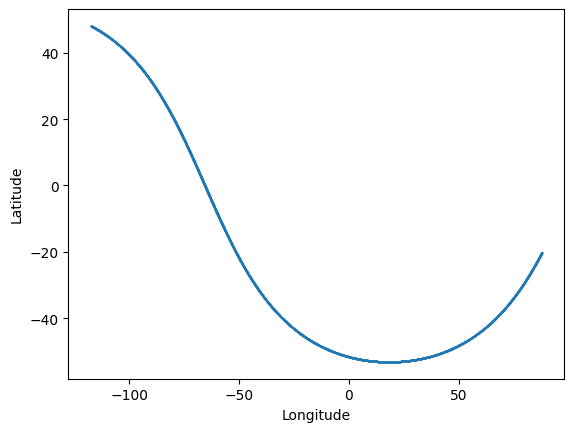

In [ ]:
plt.scatter(x=starlink_2701['longitude'], y=starlink_2701['latitude'], s=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

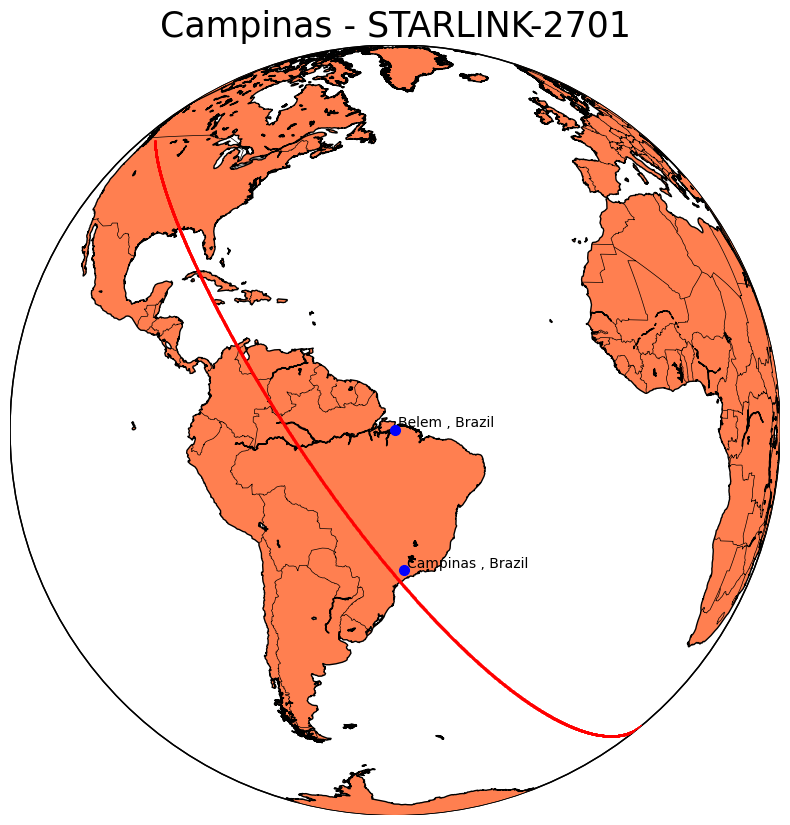

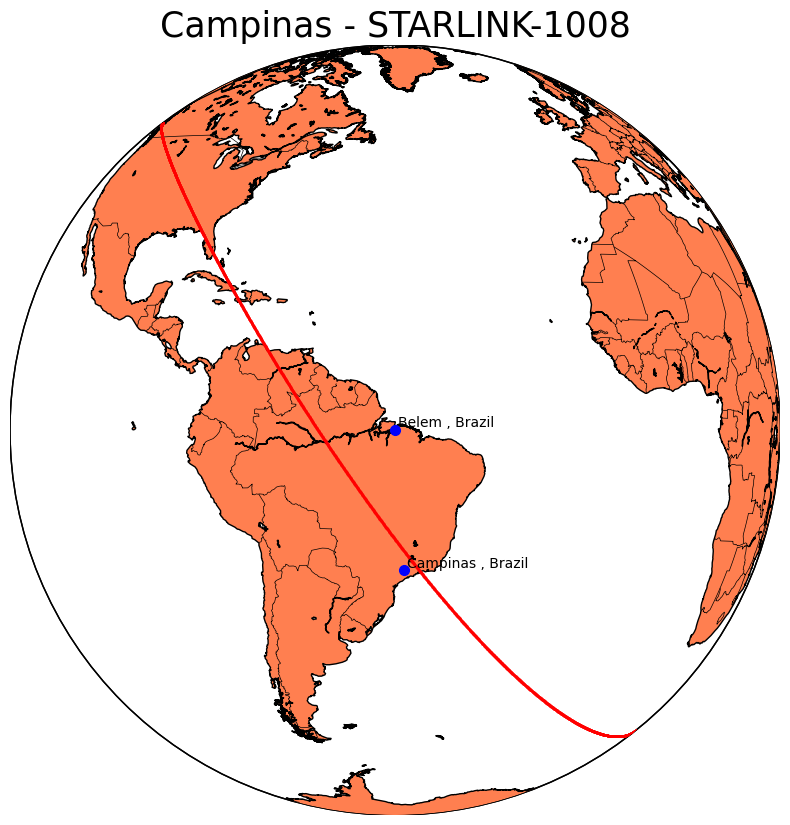

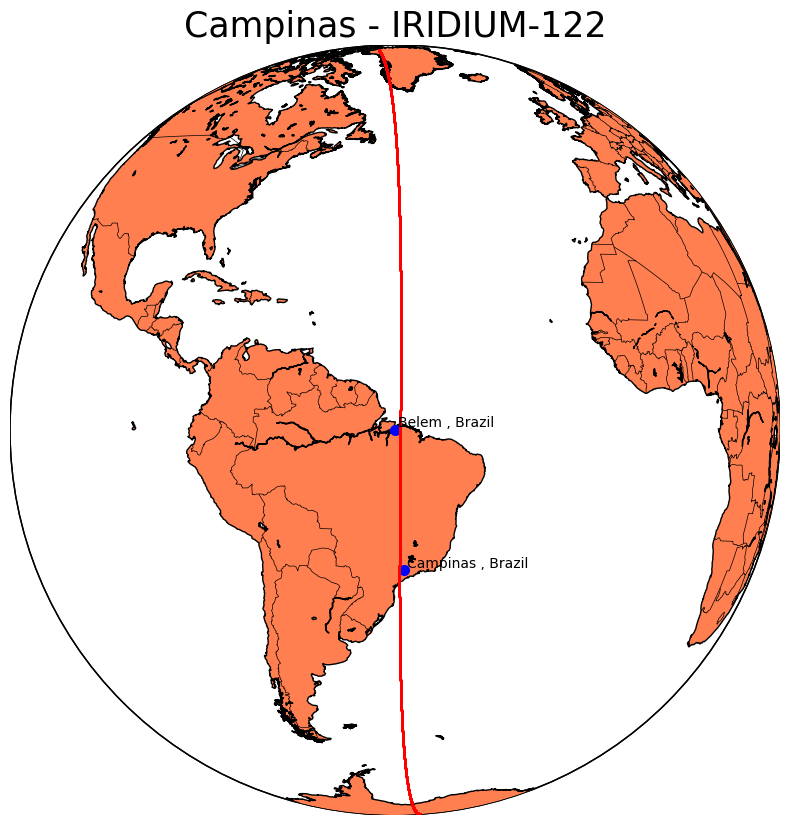

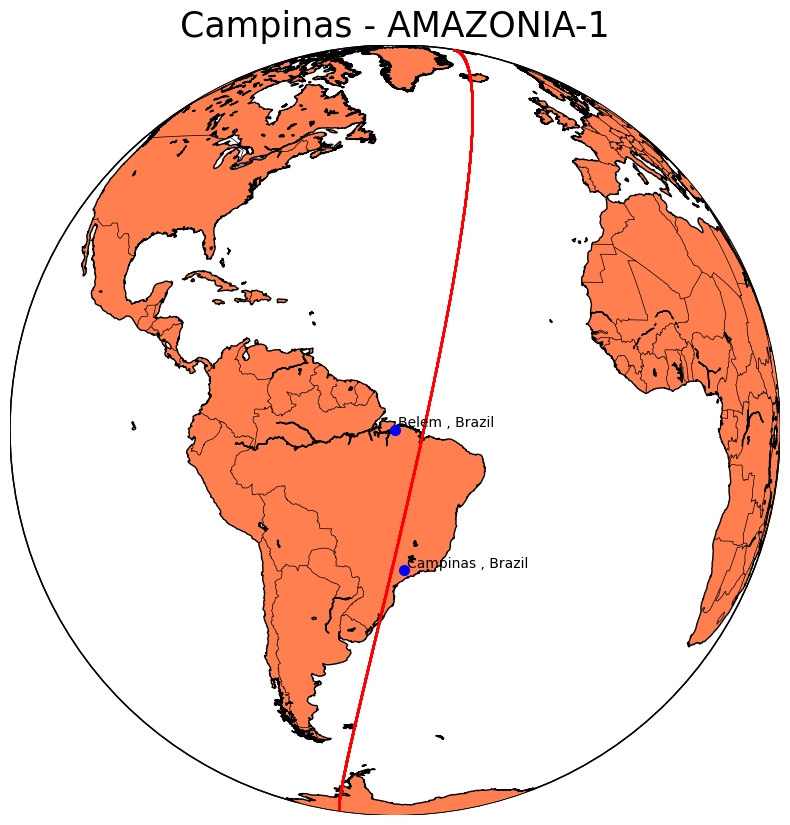

In [ ]:
map = Basemap(projection='ortho', resolution='l', lat_0 = lat_ufpa, lon_0=lon_ufpa)

cities = ["Campinas , Brazil", "Belem , Brazil"]
lat = [lat_unicamp, lat_ufpa]
lon = [lon_unicamp, lon_ufpa]


#for idx, satellite in enumerate(sats):
  #print(satellite[idx])
  #plt.title(f"Campinas - {satellite[idx]['SatName']}")
  #_sat, y_sat = map(satellite[idx]['longitude'], satellite[idx]['latitude'])
  #map.plot(x_sat, y_sat, 'ro', markersize=0.9, alpha=0.8)

  #plt.show()

x, y = map(lon, lat)

for i in range(len(sats)):
  plt.figure(figsize=(10,10))

  map.drawcoastlines()
  map.bluemarble()
  map.drawcountries()
  map.fillcontinents(color='coral')
  map.drawmapboundary()

  map.plot(x, y, 'bo', markersize=7)
  for name,xpt,ypt in zip(cities, x, y):
    plt.text(xpt+50000,ypt+50000,name)

  plt.title(f"Campinas - {sats[i]['SatName'].iloc[0]}", fontsize=25)
  #plt.scatter(x=sats[i]['longitude'], y=sats[i]['latitude'], s=0.1)
  #plt.xlabel('Longitude')
  #plt.ylabel('Latitude')
  x_sat, y_sat = map(sats[i]['longitude'], sats[i]['latitude'])
  map.plot(x_sat, y_sat, 'ro', markersize=0.9, alpha=0.8)
  plt.show()
#for satelite in sats:
#  for longitude, latitude in zip(satelite['longitude'], satelite['latitude']):
#    plt.subplot(1, 1, 1)
#    x_sat, y_sat = map(longitude, latitude)
#    map.plot(x_sat, y_sat, 'ro', markersize=0.9, alpha=0.8)
#    plt.show()